## Importing Libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

## Loading Dataset

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
# Normalisation

train_images = train_images / 255.0
test_images = test_images / 255.0

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

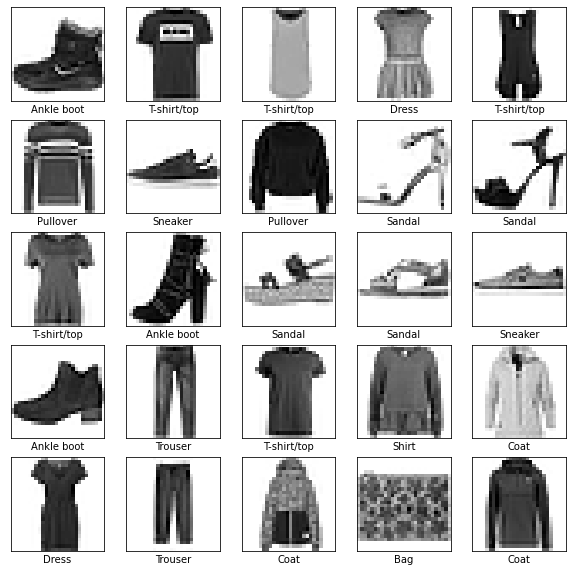

In [5]:
# Plotting of images with their label

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i], cmap='binary')
  plt.xlabel(class_names[train_labels[i]])
plt.show() 

## Creating a model

In [6]:
# Initializing a model

model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(129, activation='relu'),
                             tf.keras.layers.Dense(10)
])

In [7]:
# Since there are more than two label classes

model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [8]:
# Training the model

hist = model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5004 - accuracy: 0.8243
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3738 - accuracy: 0.8652
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3354 - accuracy: 0.8779
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3120 - accuracy: 0.8858
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2950 - accuracy: 0.8902
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2813 - accuracy: 0.8957
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2691 - accuracy: 0.9008
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2588 - accuracy: 0.9032
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2496 - accuracy: 0.9056
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.240

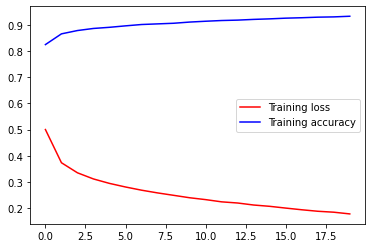

In [11]:
# Plotting loss and accuracy during epochs

plt.plot(hist.history['loss'], color='r', label="Training loss")
plt.plot(hist.history['accuracy'], color='b', label="Training accuracy")
plt.legend()
plt.show()

In [12]:
loss, accuracy = model.evaluate(test_images, test_labels, verbose=1)

313/313 [==============================] - ETA: 0s - loss: 0.3543 - accuracy: 0.88 - 0s 1ms/step - loss: 0.3532 - accuracy: 0.8886


In [13]:
print("Loss : {:.2f}".format(loss))
print("Accuracy : {:.2f}".format(accuracy))

Loss : 0.35
Accuracy : 0.89


In [14]:
# Wrapping the model and attach softmax to it to obtain probability

probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

In [15]:
predictions[10]

array([5.6358058e-06, 1.2423990e-09, 3.0495953e-02, 2.2523604e-07,
       9.5841295e-01, 2.8785332e-09, 1.1084779e-02, 6.3538765e-09,
       4.3544858e-08, 4.5590315e-07], dtype=float32)

In [16]:
test_images[10].shape

(28, 28)

In [17]:
img = test_images[10]
img = np.expand_dims(img,0)
print(img.shape)

single_prediction = probability_model.predict(img)
print(single_prediction)
print(np.argmax(single_prediction[0]))

(1, 28, 28)
[[5.6358058e-06 1.2423990e-09 3.0495968e-02 2.2523710e-07 9.5841295e-01
  2.8785385e-09 1.1084801e-02 6.3538406e-09 4.3544944e-08 4.5590446e-07]]
4


In [18]:
# Function to plot image with predicted label

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap='binary')
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
                                       color=color)



# Function to plot barplot of predicted labels with probability distribution
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.xticks(range(10))
  plt.yticks([])
  thisisplot = plt.bar(range(10), predictions_array, color='#096754')
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)
  thisisplot[predicted_label].set_color('red')
  thisisplot[true_label].set_color('blue')

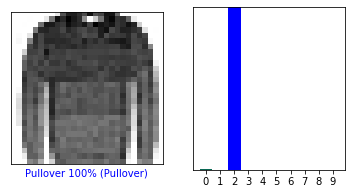

In [19]:
# Ploting image with predicted label and probability distribution obtained from model

i = 20
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

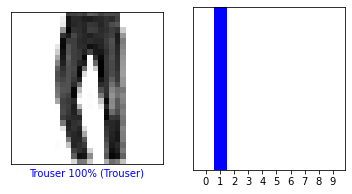

In [20]:
# Ploting image with predicted label and probability distribution obtained from model

i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

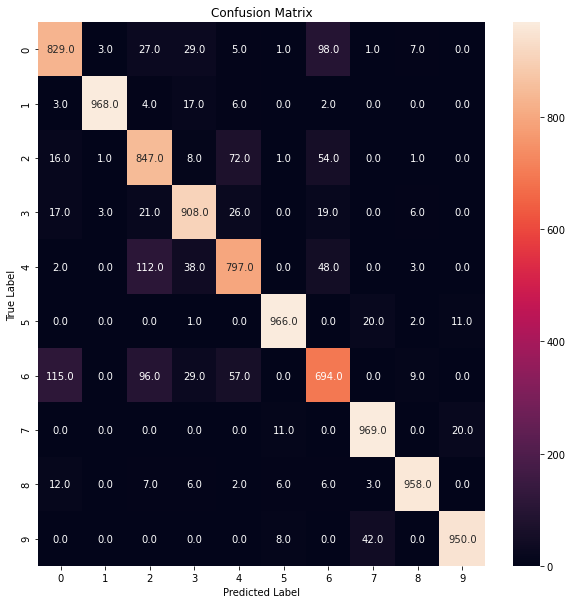

In [21]:
# Plotting Confusion Matrix

probability_model.predict(test_images)
y_predict=probability_model.predict(test_images)
y_predict_classes=np.argmax(y_predict,axis=1)
# print(y_predict_classes)
# print(test_labels)

confusion_mtx = confusion_matrix(test_labels, y_predict_classes)

f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(confusion_mtx, annot=True, fmt=".1f", ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()